<a href="https://colab.research.google.com/github/Bhargavvv412/all-models/blob/main/K_Means_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

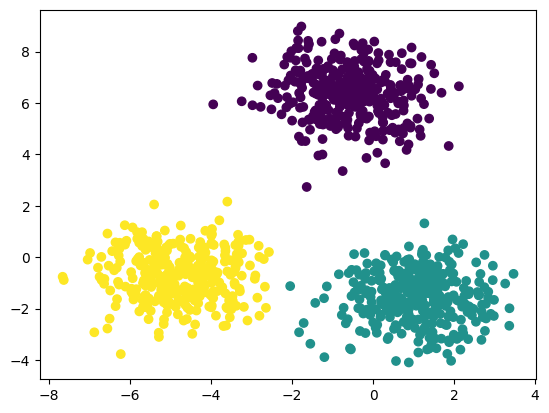

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [12]:
X_train_Scaled=scaler.fit_transform(X_train)
X_test_Scaled=scaler.transform(X_test)

In [13]:
from sklearn.cluster import KMeans

In [14]:
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train_Scaled)
  wcss.append(kmeans.inertia_)

In [15]:
wcss

[1340.0000000000011,
 701.2436039910859,
 142.82225957209042,
 122.69184817973141,
 103.56753177101861,
 80.9522800798386,
 73.86680440692686,
 68.22131663889225,
 59.99536307307331,
 54.79001283735762]

([<matplotlib.axis.XTick at 0x7b59473125d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

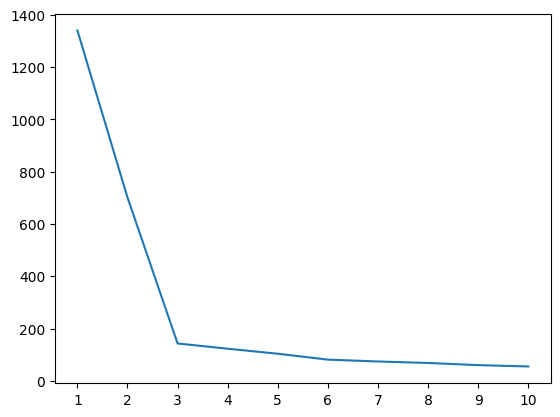

In [17]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))

In [18]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [20]:
y_pred=kmeans.predict(X_test_Scaled)

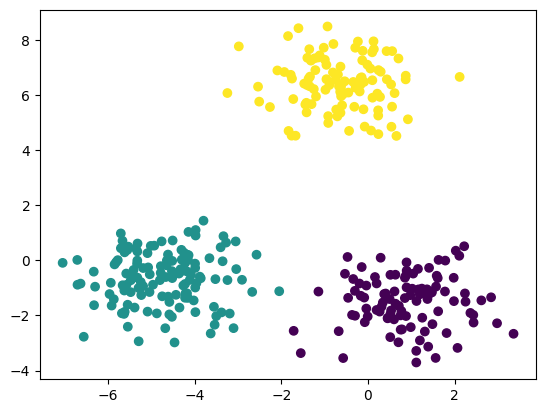

In [21]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [22]:
!pip install kneed

In [23]:
from kneed import KneeLocator

In [25]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [29]:
kl.elbow

np.int64(3)

In [30]:
from sklearn.metrics import silhouette_score

In [32]:
silhouette_coeff=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train_Scaled)
  score=silhouette_score(X_train_Scaled,kmeans.labels_)
  silhouette_coeff.append(score)

In [33]:
silhouette_coeff

[np.float64(0.519939103278857),
 np.float64(0.7313683404353942),
 np.float64(0.6101008373780515),
 np.float64(0.48644919600174374),
 np.float64(0.3698921884857514),
 np.float64(0.3587923925352278),
 np.float64(0.35319169711738213),
 np.float64(0.33357274570932227),
 np.float64(0.3469698425687943)]

([<matplotlib.axis.XTick at 0x7b59470ece50>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

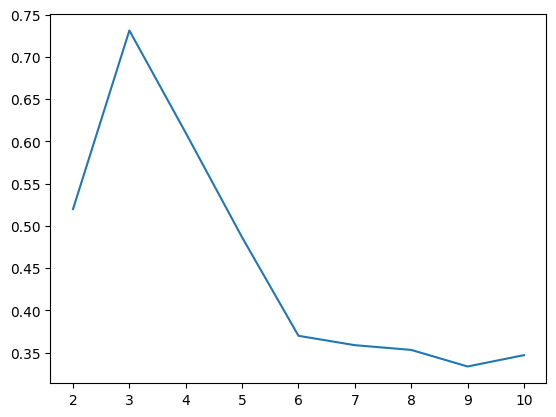

In [35]:
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))